<a href="https://colab.research.google.com/github/kaushik67/ceri8211globalgeophysics/blob/master/Homework_2_6b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
'Copy of firstnotebook (1).ipynb'   firstnotebook.ipynb   Untitled0.ipynb
'Copy of firstnotebook.ipynb'	    GGM05C.ICGEM	  Untitled1.ipynb
[ 9.90861031e-07 -2.00950900e-07] [ 9.90861031e-07+0.000000e+00j -0.00000000e+00-2.009509e-07j]
(9.908610311151e-07+2.009508998058e-07j)
(2+0j)
3 60
10 11


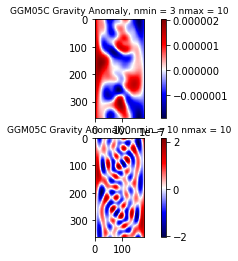

3 1885
60 61


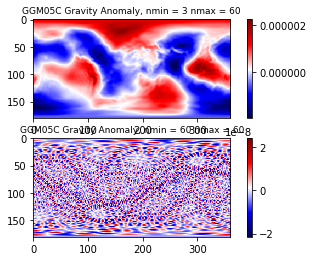

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm

halfpi, pi, twopi = [f*np.pi for f in (0.5, 1, 2)]
degs, rads = 180/pi, pi/180
j = np.complex(0, 1)

from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Colab Notebooks/"

fname = "/content/drive/My Drive/Colab Notebooks/GGM05C.ICGEM"

with open(fname, 'r') as infile:
    lines = infile.readlines()

num_header_lines = 35

h_lines = [line.split() for line in lines[num_header_lines:]]
indices = np.array([[int(x)   for x in line[1:3]] for line in h_lines])
coeffs  = np.array([[float(x.replace('D', 'E')) for x in line[3:5]] for line in h_lines])

Cstars = (np.array([1, -j]) * coeffs).sum(axis=1) # make complex coefficient

print(coeffs[13], np.array([1, +j])*coeffs[13])
print( Cstars[13] )
print( (1.0+1.0*j) * (1.0-1.0*j) )

phi         = np.linspace(0,  pi,    180+1)
theta         = np.linspace(0,  twopi, 360+1)
phi, theta = np.meshgrid(phi, theta)

harmonics = []
nmax = 10
for (n, m), Cstar in zip(indices, Cstars):
    if n > nmax:
      break
    #print(n,m)
    Y = sph_harm(m, n, theta, phi)
    harmonics.append((n, m, (Y * Cstar).real))  # 3-tuple of n, m, Y*C product

# evaluate gravity anomalies
nmins = (3, 10)

Deltags = []

for nmin in nmins:
    count = 0
    Deltag = np.zeros_like(phi)
    for n, m, h in harmonics:
        if n >= nmin:
            Deltag += h
            count += 1
    print(nmin, count)
    Deltags.append(Deltag)

if True:
    plt.figure()
    for i, (nmin, Deltag) in enumerate(zip(nmins, Deltags)):
        plt.subplot(len(Deltags), 1, i+1)
        plt.imshow(Deltag, cmap='seismic')
        plt.title('GGM05C Gravity Anomaly, nmin = ' + str(nmin) + ' nmax = ' + str(nmax), fontsize = 9)
        plt.colorbar()
    plt.show()

ph         = np.linspace(0,  pi,    180+1)
th         = np.linspace(0,  twopi, 360+1)
phi, theta = np.meshgrid(ph, th, indexing='ij')

harmonics = []
nmax = 60
for (n, m), Cstar in zip(indices, Cstars):
    if n > nmax:
      break
    #print(n,m)
    Y = sph_harm(m, n, theta, phi)
    harmonics.append((n, m, (Y * Cstar).real))  # 3-tuple of n, m, Y*C product

# evaluate gravity anomalies
nmins = (3, 60)

Deltags = []

for nmin in nmins:
    count = 0
    Deltag = np.zeros_like(phi)
    for n, m, h in harmonics:
        if n >= nmin:
            Deltag += h
            count += 1
    print(nmin, count)
    Deltags.append(Deltag)

if True:
    plt.figure()
    for i, (nmin, Deltag) in enumerate(zip(nmins, Deltags)):
        plt.subplot(len(Deltags), 1, i+1)
        plt.imshow(Deltag, cmap='seismic')
        plt.title('GGM05C Gravity Anomaly, nmin = ' + str(nmin) + ' nmax = ' + str(nmax), fontsize = 9)
        plt.colorbar()
    plt.show()